# OpenWeb Task - Idan Hadromi

### Get Data

In [ ]:
import pandas as pd

<font color='blue'>**tweets**</font>

In [ ]:
tweets = pd.read_csv('tweets.csv')

In [ ]:
display(tweets.shape)
display(tweets.head(3))

(203482, 16)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,#IslamKills Are you trying to say that there w...,7.123460e+17,NaN,"[""IslamKills""]",[],POSTED,[],NaN,NaN
1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"Clinton: Trump should’ve apologized more, atta...",7.855849e+17,"<a href=""http://twitterfeed.com"" rel=""nofollow...",[],"[""http://detne.ws/2e172jF""]",POSTED,[],NaN,NaN
2,1.710805e+09,cookncooks,1.487767e+12,2017-02-22 12:43:43,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of ...,8.343832e+17,NaN,[],[],POSTED,[],NaN,NaN


<font color='blue'>**users**</font>

In [ ]:
users = pd.read_csv('users.csv')

In [ ]:
display(users.shape)
display(users.head(3))

(454, 14)

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
2,247165706.0,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0


### Data Cleaning

<font color='blue'>**Trasnform to lower Case**</font>

In [ ]:
def Trasnform_to_lower_Case (tweet):
    tweet = str(tweet)
    return tweet.lower()

tweets['text'] = tweets['text'].apply(lambda x: Trasnform_to_lower_Case(x))

<font color='blue'>**Drop not relevant characters**</font>

In [ ]:
import re 

def drop_not_relevant_char (tweet):
   text = re.sub('/^[0-9]+$',' ',tweet) #numeric to blank
   text = re.sub('/[a-zA-Z_][0-9a-zA-Z_]*/',' ',tweet) # identifier to blank 
   text = re.sub('/^\w+\.(gif|png|jpg|jpeg)$/|',' ',tweet) # image file to blank
   text = re.sub('/^\w+([\.-]?\w+)*@\w+([\.-]?\w+)*(\.\w{2,3})+$/',' ',tweet) #email to blank
   text = re.sub('/^http:\/\/\S+(\/\S+)*(\/)?S/',' ',tweet) # http to blank
   text = re.sub('\w+/\_',' ',tweet) # punctuation to blank
   return text

tweets['text'] = tweets['text'].apply(lambda x: drop_not_relevant_char(x) )

<font color='blue'>**Trasnform text to list (word tokenize)**</font>

In [ ]:
import nltk
#nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize

def text_to_list (tweet):
    return word_tokenize(tweet)

In [ ]:
tweets['text'] = tweets['text'].apply(lambda x:word_tokenize(x) )

<font color='blue'>**Drop punctuation**</font>

In [ ]:
import string

def remove_punctuation (tweet): 
    result = string.punctuation 
    text = [word for word in tweets if word.isalpha()]
    text = [word for word in tweet if not word in result]
    return text


In [ ]:
tweets['text'] = tweets['text'].apply(lambda x: remove_punctuation(x))

<font color='blue'>**Remove stop words**</font>

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

add_words =["'s",'``',"''",'’','...','‘','“','..','”'
           ,'2','//…','/…','//t…','//t.c…','//t.…'
           ,'4','1','//t.co/…','--','…','–'
           ,'//t.co…','....','3']
stop_words.update(add_words)

def remove_stop_words (tweet):
    return [word for word in tweet if not word in stop_words]

In [ ]:
tweets['text'] = tweets['text'].apply(lambda x: remove_stop_words(x))

<font color='blue'>**Keep word meaning (lemmatizing)**</font>

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def meaning_of_word (tweet):
    return [lemmatizer.lemmatize(word) for word in tweet]

tweets['text'] = tweets['text'].apply(lambda x: meaning_of_word(x))

<font color='blue'>**Keep root of word (stemming)**</font>

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def root_of_word (tweet):
    return [stemmer.stem(word) for word in tweet]

In [ ]:
tweets['text'] = tweets['text'].apply(lambda x: root_of_word(x))

<font color='blue'>**Create list of words features**</font>

In [ ]:
total_words = []
for words in tweets['text']:
    total_words.extend(words)

In [ ]:
len(total_words)

2210423

In [ ]:
from collections import Counter
Counter(total_words).most_common()[:50]

[('rt', 149840),
 ('http', 129125),
 ('trump', 29762),
 ("n't", 13929),
 ('clinton', 12712),
 ('hillari', 11467),
 ('amp', 9839),
 ('obama', 9565),
 ('peopl', 6759),
 ('get', 6601),
 ('say', 6302),
 ('u', 6234),
 ('like', 6014),
 ('go', 5432),
 ('new', 5295),
 ('vote', 5197),
 ('polit', 5116),
 ('one', 5021),
 ('donald', 4894),
 ('realdonaldtrump', 4810),
 ('make', 4751),
 ('news', 4726),
 ('want', 4545),
 ('via', 4257),
 ('time', 4200),
 ('presid', 4022),
 ('day', 4003),
 ('support', 3971),
 ('tcot', 3905),
 ('america', 3842),
 ('know', 3830),
 ('black', 3764),
 ('elect', 3713),
 ('american', 3706),
 ("'m", 3614),
 ('need', 3588),
 ('call', 3524),
 ('love', 3452),
 ('woman', 3408),
 ('would', 3398),
 ('think', 3390),
 ('right', 3345),
 ("'re", 3307),
 ('take', 3169),
 ('year', 3016),
 ('hillaryclinton', 3009),
 ('see', 2927),
 ('never', 2888),
 ('look', 2837),
 ('pjnet', 2831)]

<font color='blue'>**filter words features (0.5% threshold)**</font>

In [ ]:
import numpy as np
min_threshold = np.ceil(0.005* len(tweets))

In [ ]:
word_freq = {x: count for x, count in Counter(total_words).items() if count >= min_threshold}

In [ ]:
temp = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
temp['%frequency'] = np.round(temp['frequency']/len(tweets)*100,0)

In [ ]:
temp.sort_values(by='%frequency',ascending=False).reset_index(drop=True)

,word,frequency,%frequency
0,rt,149840,74.0
1,http,129125,63.0
2,trump,29762,15.0
3,n't,13929,7.0
4,clinton,12712,6.0
...,...,...,...
219,good,2675,1.0
220,fight,1323,1.0
221,job,1418,1.0
222,game,1094,1.0


In [ ]:
total_words = list({x: count for x, count in Counter(total_words).items() if count >= min_threshold}.keys())

In [ ]:
len(total_words)

224

<font color='blue'>**keep relevant words**</font>

In [ ]:
def relevant_words (tweet):
    return [word for word in tweet if word in total_words]

tweets['text'] = tweets['text'].apply(lambda x: relevant_words(x))

<font color='blue'>**convert words to features (vectorize)**</font>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')
cvec.fit(total_words)

CountVectorizer(stop_words='english')

In [ ]:
vectorize = pd.DataFrame()
for index, tweet in enumerate(tweets['text'][:50000]):
    temp = pd.DataFrame(cvec.transform(tweets['text'][index]).todense(),columns=cvec.get_feature_names()).sum()
    temp= pd.DataFrame(temp).reset_index().transpose().reset_index(drop=True)
    temp.columns = temp.iloc[0,:]
    temp = temp.iloc[1,:]
    vectorize= vectorize.append(temp, ignore_index=True)


In [ ]:
vectorize.head(2)

,2016,alway,america,american,amp,anoth,ask,attack,believ,best,...,watch,way,white,wikileak,win,woman,word,work,world,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color='blue'>**Merge vectorize to tweets**</font>

In [ ]:
df = pd.concat([tweets[:32362],vectorize],axis=1)

In [ ]:
df.loc[:,['tweet_id','text','tri', 'say', 'terrorist', 'attack', 'refuge', 'let','http']].head()

,tweet_id,text,tri,say,terrorist,attack,refuge,let,http
0,7.123460e+17,"[tri, say, terrorist, attack, refuge, let]",1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,7.855849e+17,"[clinton, trump, attack, http]",0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,8.343832e+17,"[rt, best, presid, year, vote, amp]",0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.134006e+17,"[rt, n't]",0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.940243e+17,"[rt, email, could, see, http]",0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# save file
#df.to_csv("df.csv")

In [ ]:
# upload file
import pandas as pd
df = pd.read_csv('df.csv')
df = df[:32362]
df.shape

(32362, 205)

In [ ]:
def Convert_string_to_list(string): 
    li = list(string.split(",")) 
    return li 

df['text'] = df['text'].apply(lambda x:Convert_string_to_list(x) )  

In [ ]:
vectorize = df.loc[:,df.columns[17:]]

<font color='blue'>**Most common topics**</font>

In [ ]:
# ! pip install gensim
from gensim import corpora
dictionary = corpora.Dictionary(df['text'])

In [ ]:
corpus_1 = [dictionary.doc2bow(t) for t in df['text']]

In [ ]:
from gensim.models.ldamodel import LdaModel

In [ ]:
lda_model = LdaModel(
    corpus=corpus_1, id2word=dictionary, num_topics=4, random_state=42)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.106*"[\'rt\'" + 0.083*" \'http\']" + 0.039*" \'support\'" + '
  '0.038*"[\'http\']" + 0.032*" \'tcot\'" + 0.030*" \'trump\'" + 0.018*" '
  '\'pjnet\'" + 0.018*" \'news\']" + 0.016*" \'http\'" + 0.016*" \'help\'"'),
 (1,
  '0.226*"[\'rt\'" + 0.151*" \'http\']" + 0.019*" \'hillari\'" + 0.017*" '
  '"n\'t"" + 0.016*"[]" + 0.016*" \'clinton\'" + 0.015*" \'amp\'" + 0.015*" '
  '\'get\'" + 0.014*" \'trump\'" + 0.011*" \'like\'"'),
 (2,
  '0.085*" \'trump\'" + 0.072*"[\'rt\'" + 0.071*"[\'rt\']" + 0.060*" '
  '\'http\']" + 0.029*" \'donald\'" + 0.027*" \'polit\']" + 0.025*" "n\'t"" + '
  '0.023*" \'clinton\'" + 0.016*" \'hillari\'" + 0.014*" \'voter\'"'),
 (3,
  '0.171*"[\'rt\'" + 0.123*" \'http\']" + 0.082*" \'http\'" + 0.030*" '
  '\'obama\'" + 0.021*" \'trump\'" + 0.016*" \'u\'" + 0.015*" \'new\'" + '
  '0.012*" \'peopl\'" + 0.012*" \'via\']" + 0.011*"[\'trump\'"')]


<font color='blue'>**find fake tweets**</font>

<font color='red'>**ABOD (Angle Based Outlier Detector)**</font>

In [ ]:
# ! pip install pyod
from pyod.models.abod import ABOD
outlier_fraction = 0.2
clf =  ABOD(contamination=outlier_fraction)
clf.fit(vectorize)
ABOD_label = pd.Series(clf.labels_.tolist(),name='ABOD_label') #pd.concat([df,pd.Series(],axis=1).head()
ABOD_score = pd.Series(clf.decision_scores_.tolist(),name='ABOD_score')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
ABOD_label.value_counts()

0    32362
Name: ABOD_label, dtype: int64


<font color='red'>**Cluster-based Local Outlier Factor**</font>

In [ ]:
from pyod.models.cblof import CBLOF
outlier_fraction = 0.2
clf = CBLOF(contamination=outlier_fraction,check_estimator=False, random_state=1)
clf.fit(vectorize)
CBLOF_label = pd.Series(clf.labels_.tolist(),name='CBLOF_label')  # binary labels (0: inliers, 1: outliers)
CBLOF_scores = pd.Series(clf.decision_scores_.tolist(),name='CBLOF_scores')  # raw outlier scores

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [ ]:
CBLOF_label.value_counts()

0    25889
1     6473
Name: CBLOF_label, dtype: int64

<font color='red'>**Feature Bagging**</font>

In [ ]:
#! pip install pyod
#! pip install combo
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.lof import LOF
outlier_fraction = 0.2
clf = FeatureBagging(LOF(n_neighbors=35),contamination=outlier_fraction,check_estimator=False,random_state=1)
clf.fit(vectorize)
FeatureBagging_label = pd.Series(clf.labels_.tolist(),name='FeatureBagging_label')  # binary labels (0: inliers, 1: outliers)
FeatureBagging_scores = pd.Series(clf.decision_scores_.tolist(),name='FeatureBagging_scores')  # raw outlier scores

In [ ]:
FeatureBagging_label.value_counts()

0    25889
1     6473
Name: FeatureBagging_label, dtype: int64

<font color='red'>**Histogram-base Outlier Detection**</font>

In [ ]:
from pyod.models.hbos import HBOS
clf = HBOS(contamination=outlier_fraction)
clf.fit(vectorize)
HBOS_label = pd.Series(clf.labels_.tolist(),name='HBOS_label')  # binary labels (0: inliers, 1: outliers)
HBOS_scores = pd.Series(clf.decision_scores_.tolist(),name='HBOS_scores')  # raw outlier scores

In [ ]:
HBOS_label.value_counts()

0    25889
1     6473
Name: HBOS_label, dtype: int64


<font color='red'>**KNN detector**</font>

In [ ]:
from pyod.models.knn import KNN
clf = KNN()
clf.fit(vectorize)
KNN_label = pd.Series(clf.labels_.tolist(),name='KNN_label')  # binary labels (0: inliers, 1: outliers)
KNN_scores = pd.Series(clf.decision_scores_.tolist(),name='KNN_scores')  # raw outlier scores

In [ ]:
KNN_label.value_counts()

0    29611
1     2751
Name: KNN_label, dtype: int64

<font color='red'>**Average KNN**</font>

In [ ]:
from pyod.models.knn import KNN
clf = KNN(method='mean',contamination=outlier_fraction)
clf.fit(vectorize)
KNN_Avg_label = pd.Series(clf.labels_.tolist(),name='KNN_Avg_label')  # binary labels (0: inliers, 1: outliers)
KNN_Avg_scores = pd.Series(clf.decision_scores_.tolist(),name='KNN_Avg_scores')  # raw outlier scores

In [ ]:
KNN_Avg_label.value_counts()

0    26661
1     5701
Name: KNN_Avg_label, dtype: int64

<font color='red'>**Isolation Forest**</font>


In [ ]:
from pyod.models.iforest import IForest
clf = IForest(contamination=outlier_fraction,random_state=1)
clf.fit(vectorize)
Isolation_Forest_label = pd.Series(clf.labels_.tolist(),name='Isolation_Forest')  # binary labels (0: inliers, 1: outliers)
Isolation_Forest_scores = pd.Series(clf.decision_scores_.tolist(),name='Isolation_Forest')  # raw outlier scores

In [ ]:
Isolation_Forest_label.value_counts()

0    25890
1     6472
Name: Isolation_Forest, dtype: int64


<font color='red'>**Ensembling models votes**</font>


In [ ]:
summary = pd.concat([
                     ABOD_label
                    ,CBLOF_label
                    ,FeatureBagging_label
                    ,HBOS_label
                    ,KNN_label
                    ,KNN_Avg_label
                    ,Isolation_Forest_label
                   ],axis=1)

In [ ]:
summary['score'] = summary.sum(axis=1)
#summary = summary.sort_values(by='score',ascending=False)

In [ ]:
import numpy as np
summary['anomaly_detection'] = summary['score'].apply(lambda x : np.select(condlist=[x==0,x<=3.5,x<=5.5,x<=7]
                                                                           ,choicelist=['inliers','low_prob','high_prob','outliers']))
summary.groupby(['anomaly_detection']).size()
#summary.sort_index()

anomaly_detection
high_prob     3510
inliers      20276
low_prob      7460
outliers      1116
dtype: int64

In [ ]:
# save as csv
#summary.to_csv('anomaly_detection_summary.csv',index=False)

<font color='blue'>**Add outlier Indicator to dataset (df)**</font>

In [ ]:
summary = pd.read_csv('anomaly_detection_summary.csv')
df = pd.concat([df,summary['anomaly_detection']],axis=1)

In [ ]:
df[['text','anomaly_detection']].head(10)

,text,anomaly_detection
0,"[['tri', 'say', 'terrorist', 'attack', 're...",high_prob
1,"[['clinton', 'trump', 'attack', 'http']]",inliers
2,"[['rt', 'best', 'presid', 'year', 'vote', ...",outliers
3,"[['rt', ""n't""]]",inliers
4,"[['rt', 'email', 'could', 'see', 'http']]",inliers
5,[[]],inliers
6,"[['rt', 'never', 'tweet', 'someth', 'post'...",inliers
7,"[['rt', 'new', 'post', 'watch', 'video', ...",low_prob
8,"[['rt', 'woman', 'face', 'trump', 'sign', ...",high_prob
9,"[['one', 'way']]",inliers


### Question 1


<font color='blue'>**fake tweets topics**</font>

In [ ]:
df['fake_tweets'] = df['anomaly_detection'].apply(lambda x : np.select(condlist=[x=='high_prob',x=='outliers',x=='inliers',x=='low_prob']
                                                                       ,choicelist=[1,1,0,0]))

In [ ]:
# ! pip install gensim
from gensim import corpora
dictionary = corpora.Dictionary(df.loc[df['fake_tweets']==1,'text'])

In [ ]:
corpus_1 = [dictionary.doc2bow(t) for t in df.loc[df['fake_tweets']==1,'text']]

In [ ]:
from gensim.models.ldamodel import LdaModel

In [ ]:
lda_model = LdaModel(
    corpus=corpus_1, id2word=dictionary, num_topics=4, random_state=42)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.096*"[\'rt\'" + 0.042*" \'http\']" + 0.031*" "n\'t"" + 0.022*" \'trump\'" '
  '+ 0.019*" \'peopl\'" + 0.019*" \'great\'" + 0.017*" \'http\'" + 0.017*" '
  '\'realdonaldtrump\'" + 0.016*" \'pleas\'" + 0.014*" \'support\'"'),
 (1,
  '0.088*"[\'rt\'" + 0.044*" \'amp\'" + 0.041*" \'http\']" + 0.028*" '
  '\'trump\'" + 0.023*" \'hillari\'" + 0.021*" "n\'t"" + 0.019*" \'obama\'" + '
  '0.019*" \'vote\'" + 0.016*" \'clinton\'" + 0.014*" \'http\'"'),
 (2,
  '0.097*"[\'rt\'" + 0.044*" \'http\']" + 0.028*" \'want\'" + 0.026*" \'say\'" '
  '+ 0.025*" \'white\'" + 0.021*" \'hillari\'" + 0.019*" \'trump\'" + 0.017*" '
  '\'everi\'" + 0.017*" \'day\'" + 0.017*" \'clinton\'"'),
 (3,
  '0.107*"[\'rt\'" + 0.081*" \'http\']" + 0.043*" \'trump\'" + 0.026*" '
  '\'clinton\'" + 0.025*" \'http\'" + 0.021*" \'hillari\'" + 0.014*" \'vote\'" '
  '+ 0.013*" \'amp\'" + 0.013*" \'obama\'" + 0.011*" \'tcot\'"')]



<font color='blue'>**the emotions in those fake tweets (Sentiment Analysis)**</font>

In [ ]:
# ! pip install afinn
from afinn import Afinn
af = Afinn()

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in df['text'].astype(str)]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [ ]:
emotion = pd.DataFrame(sentiment_category,columns=['emotion'])

In [ ]:
df = pd.concat([df,emotion],axis=1)

#save csv
df.to_csv('df.csv',index=False)

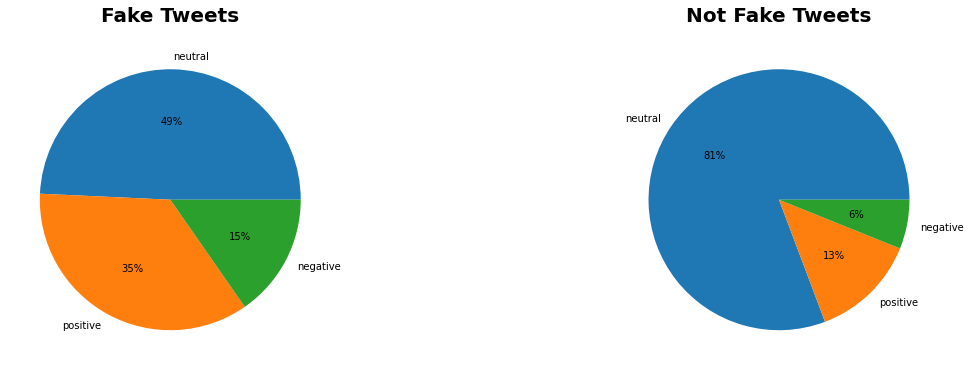

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(20,6),nrows=1, ncols=2)

ax= df.loc[df['fake_tweets']==1,'emotion'].value_counts().plot(kind='pie',ax=axes[0],autopct="%.f%%");
ax.set_ylabel('');
ax.set_title('Fake Tweets',size=20,pad=15,fontweight='bold');

bx= df.loc[df['fake_tweets']==0,'emotion'].value_counts().plot(kind='pie',ax=axes[1],autopct="%.f%%");
bx.set_ylabel('');
bx.set_title('Not Fake Tweets',size=20,pad=15,fontweight='bold');

<font color='blue'>**User network fake tweets**</font>

In [ ]:
total_users = len(df.loc[:,'user_key'].drop_duplicates())
total_users_not_fake_tweets = len(df.loc[df['fake_tweets']==0,'user_key'].drop_duplicates())
total_users_fake_tweets = len(df.loc[df['fake_tweets']==1,'user_key'].drop_duplicates())

print(f"""
           total users {total_users}
           total users not fake tweets {total_users_not_fake_tweets}
           total users fake tweets {total_users_fake_tweets}
     """)
      
      
      


           total users 357
           total users not fake tweets 351
           total users fake tweets 229
     


**df table (tweets and words features)**

In [ ]:
df.head(2)

,Unnamed: 0,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,...,wikileak,win,woman,word,work,world,year,anomaly_detection,fake_tweets,emotion
0,0,1.868981e+09,ryanmaxwell_1,1.458672e+12,2016-03-22 18:31:42,NaN,NaN,NaN,"[['tri', 'say', 'terrorist', 'attack', 're...",7.123460e+17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,high_prob,1,negative
1,1,2.571870e+09,detroitdailynew,1.476133e+12,2016-10-10 20:57:00,0.0,False,0.0,"[['clinton', 'trump', 'attack', 'http']]",7.855849e+17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inliers,0,negative


**users table (users profile)**

In [ ]:
users.head(2)

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0


**Merge tables**

In [ ]:
users.reset_index(drop=True,inplace=True)
users = users.loc[~users['id'].isin([None,np.nan,'nan']),:]

In [ ]:
#df = pd.merge(left=df,right=users,how='left', left_on='user_id', right_on='id')

### Question 2

In [1]:
#upload csv
df = pd.read_csv('df.csv')
df = df.loc[:,~df.columns.duplicated()]
df.shape

NameError: ignored

<font color='blue'>**Are the fake tweets distinguishable from real ones?**</font>

chi square (goodness of fit test)

H0 : distribution of emotions are similar in fake and not fake datasets <br>
H1:  distribution of emotions are not similar in fake and not fake datasets

expected_proportions 

In [ ]:
df.loc[df['fake_tweets']==0,'emotion'].value_counts()/len(df)

neutral     0.691954
positive    0.112879
negative    0.052222
Name: emotion, dtype: float64

observed_counts

In [ ]:
df.loc[df['fake_tweets']==1,'emotion'].value_counts()

neutral     2279
positive    1638
negative     709
Name: emotion, dtype: int64

In [ ]:
from scipy.stats import chisquare
# can we assume anything from our sample
significance = 0.05



# what do we expect to see in proportions?
expected_proportions = [0.738706,0.112818,0.033403]

# what counts did we see in our sample?
observed_counts = [2279,1638,709]

########################
# how big was our sample
sample_size = sum(observed_counts)
# we derive our comparison counts here for  our expected proportions, based on the sample size
expected_counts = [float(sample_size) * x for x in expected_proportions]
# Get the stat data
(chi_stat, p_value) = chisquare(observed_counts, expected_counts)
# report
print('chi_stat: %0.5f, p_value: %0.5f' % (chi_stat, p_value))
if p_value > significance:
   print("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print("Reject the null hypothesis - suggest the alternative hypothesis is true")

chi_stat: 4755.64387, p_value: 0.00000
Reject the null hypothesis - suggest the alternative hypothesis is true


In [ ]:
print("""\n\n
       ************************************************************************************************************ 
       
           summary:
           Given our sample the probability the distribution are the same is ~0%. 
           There is sufficent evidence to conclude the fake tweets distribution different from not fake tweets 
           
           
       ************************************************************************************************************\n\n""")




       ************************************************************************************************************ 
       
           summary:
           Given our sample the probability the distribution are the same is ~0%. 
           There is sufficent evidence to conclude the fake tweets distribution different from not fake tweets 
           
           
       ************************************************************************************************************




<font color='blue'>**create supervised learning**</font>

In [ ]:
import pandas as pd
df = pd.read_csv('df.csv')

**Train-Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:,df.columns.isin(df.columns[17:-4])] # keep only words features
y = df['fake_tweets']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

train = pd.concat([X_train,y_train],axis=1)
test =  pd.concat([X_test,y_test],axis=1)

In [ ]:
y_train.value_counts()

0    19415
1    3238 
Name: fake_tweets, dtype: int64

In [ ]:
y_test.value_counts()

0    8321
1    1388
Name: fake_tweets, dtype: int64

**Underfit-overfit test (using Log Loss)**

In [ ]:
#! pip install xgboost
import xgboost
import warnings
warnings.filterwarnings("ignore")

classifier= xgboost.XGBClassifier(n_estimators=150, max_depth = 5,eval_metric='logloss')
classifier.fit(X_train, y_train, eval_set=([(X_train, y_train),( X_test, y_test)]),verbose=False);

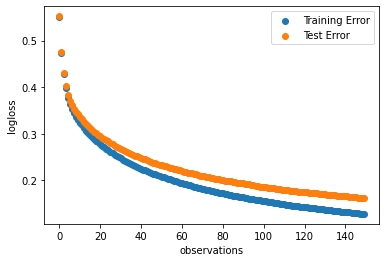

In [ ]:
import matplotlib.pyplot as plt

eval_result = classifier.evals_result()
training_rounds = range(len(eval_result['validation_0']['logloss']))

plt.scatter(x= training_rounds, y= eval_result['validation_0']['logloss'],label='Training Error' );
plt.scatter(x= training_rounds, y= eval_result['validation_1']['logloss'],label='Test Error' );
plt.ylabel('logloss')
plt.xlabel('observations')
plt.legend();

<font color='red'>**Explain: <br> Train Test not converged we can see underfitting**</font> <br>

<font color='red'>**Reccomended:**</font>  <br>
<font color='red'>1. Add features </font> <br>
<font color='red'>2. combine features</font> <br>
<font color='red'>3. more iterations </font> <br>
<font color='red'>4. Decrease regularization</font> <br>

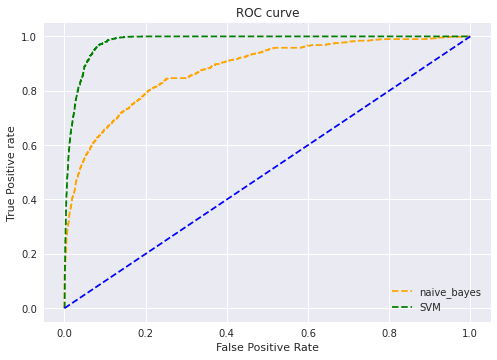

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# naive base estimator
clf = MultinomialNB()
clf.fit(X_train,y_train)
naive_bayes = clf.predict_proba(X_test)


# support vector machine estimator
SVC_classifier = SVC(kernel='rbf',gamma=0.01,C=0.6,probability=True)
SVC_classifier.fit(X_train,y_train)
SVC_classifier.score(X_test,y_test)
SVM = SVC_classifier.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, naive_bayes[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, SVM[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='naive_bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Test diffrent Metrics**

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score


scorers = {
             'accuracy_score': make_scorer(accuracy_score)
            ,'recall_score': make_scorer(recall_score)
            ,'precision_score': make_scorer(precision_score)
            ,'f1_score': make_scorer(f1_score)
            ,'roc_auc_score':make_scorer(roc_auc_score)
            
          }



classifier= xgboost.XGBClassifier(n_estimators=150, max_depth = 5,eval_metric='error')
skf = StratifiedKFold(n_splits=5)
cv_results = cross_validate(estimator = classifier, X= X_train, y=y_train, cv=skf, scoring = scorers )

In [ ]:
cv_results

{'fit_time': array([10.58750272,  8.41147327,  8.4173336 ,  8.39117432,  8.55089355]),
 'score_time': array([0.03368807, 0.03483105, 0.03343391, 0.03288674, 0.03297281]),
 'test_accuracy_score': array([0.92959612, 0.93665857, 0.93268594, 0.93377483, 0.93046358]),
 'test_recall_score': array([0.54783951, 0.59259259, 0.55864198, 0.56723338, 0.54714065]),
 'test_precision_score': array([0.93175853, 0.94348894, 0.95013123, 0.94832041, 0.94148936]),
 'test_f1_score': array([0.68999028, 0.72796209, 0.70359572, 0.7098646 , 0.69208211]),
 'test_roc_auc_score': array([0.77057183, 0.79333467, 0.77687443, 0.78104136, 0.77073746])}

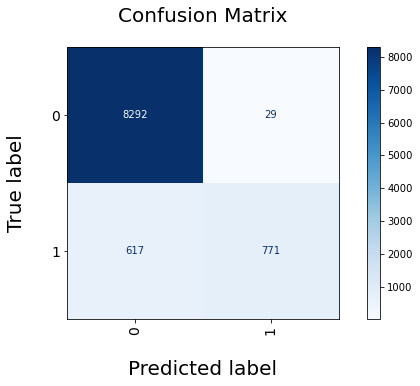

              precision    recall  f1-score   support

           0      0.931     0.997     0.963      8321
           1      0.964     0.555     0.705      1388

    accuracy                          0.933      9709
   macro avg      0.947     0.776     0.834      9709
weighted avg      0.935     0.933     0.926      9709



In [ ]:
from sklearn.metrics import plot_confusion_matrix

classifier= xgboost.XGBClassifier(n_estimators=150, max_depth = 5,eval_metric='error')
classifier.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Confusion Matrix', size =20,pad=25)
plt.xlabel('Predicted Label', size=20,labelpad=25)
plt.ylabel('True Label', size=20,labelpad=25)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plot_confusion_matrix(classifier, X_test, y_test,normalize=None,cmap='Blues',xticks_rotation ='vertical', ax=ax)  
plt.show()

from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred,digits=3))

<font color='red'>**Explain: Low recall meaning model not predict well suspicous articles.**</font>

<font color='grey'>**Business Assumption: " Don't miss Suspicous articles " (preferable high - recall, low-precision)**</font>

**Select classifiers**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

XGB = XGBClassifier()
NB = MultinomialNB()
SVM = SVC()           #kernel='rbf',gamma=0.01,C=0.6,probability=True)

**Tuning Hyperparameters (GridSearchCV)**

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
    
class DummyEstimator(BaseEstimator):
      def fit(self): pass
      def score(self): pass
        
# Create a pipeline
pipe = Pipeline([('clf', DummyEstimator())]) 


search_space = [ {  'clf': [XGBClassifier()]
                   ,'clf__objective':['binary:logistic']
                   ,'clf__n_estimators' : [10,100]
                   ,'clf__max_depth' : [3,5,10]
                   ,'clf__learning_rate' :  [0.1,0.3]
                   ,'clf__booster' : ['gbtree', 'gblinear' ,'dart']
                   ,'clf__gamma ' : [0.1,0.2]
                 }
    
                  ,{  'clf': [SVC()]  # Actual Estimator
                     ,'clf__C': [0,0.5,1,10]
                     ,'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
                     ,'clf__gamma' : [0,0.5,1,10]
                   }
                
                  ,{ 'clf': [MultinomialNB()]   # Actual Estimator
                     ,'clf__alpha': [0.5,1.5,6]  #np.linspace(0.5, 1.5, 6),
                     ,'clf__fit_prior': [True, False]
                   }              
                ]
    
    
# Create grid search 
skf = StratifiedKFold(n_splits=5)
gs = GridSearchCV(pipe, search_space ,scoring=make_scorer(recall_score),cv=skf,refit=True)

In [ ]:
display(y_train[:2000].value_counts())
gs.fit(X_train[:2000],y_train[:2000])

0    1668
1    332 
Name: fake_tweets, dtype: int64

In [ ]:
gs.best_params_

{'clf': SVC(C=10, gamma=0, kernel='linear'),
 'clf__C': 10,
 'clf__gamma': 0,
 'clf__kernel': 'linear'}

**Evaluate Classfier**

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score

clf = SVC(C=10, gamma='auto', kernel='linear',probability=True)
skf = StratifiedKFold(n_splits=5)
cv_results = cross_validate(estimator = clf, X= X_train, y=y_train, cv=skf, scoring = scorers )

In [ ]:
cv_results

{'fit_time': array([51.92725563, 50.7279892 , 50.25935912, 52.00170493, 54.34337521]),
 'score_time': array([0.60472417, 0.6618135 , 0.61547184, 0.62190223, 0.62075329]),
 'test_accuracy_score': array([0.96203928, 0.96292209, 0.96446701, 0.96710817, 0.96644592]),
 'test_recall_score': array([0.86882716, 0.87037037, 0.86882716, 0.88098918, 0.87017002]),
 'test_precision_score': array([0.86615385, 0.87037037, 0.88106416, 0.88785047, 0.89223455]),
 'test_f1_score': array([0.86748844, 0.87037037, 0.87490287, 0.88440652, 0.88106416]),
 'test_roc_auc_score': array([0.9232109 , 0.92436881, 0.92462733, 0.93122341, 0.92632889])}

In [ ]:
clf.fit(X_train,y_train)
y_scores = clf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg  8060      261     
pos  97        1291    


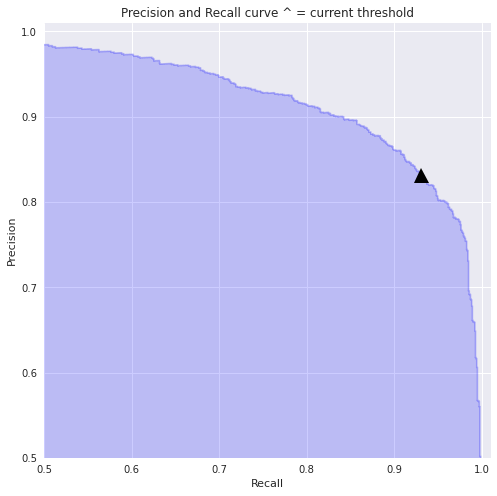

In [ ]:
precision_recall_threshold(p, r, thresholds, t=0.30)

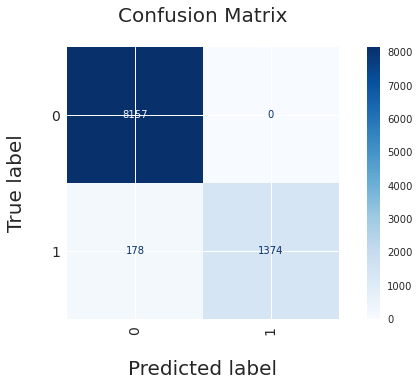

              precision    recall  f1-score   support

           0      0.988     0.969     0.978      8321
           1      0.832     0.930     0.878      1388

    accuracy                          0.963      9709
   macro avg      0.910     0.949     0.928      9709
weighted avg      0.966     0.963     0.964      9709



In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred = adjusted_classes(y_scores, t=0.3)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Confusion Matrix', size =20,pad=25)
plt.xlabel('Predicted Label', size=20,labelpad=25)
plt.ylabel('True Label', size=20,labelpad=25)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plot_confusion_matrix(clf, X_test, y_pred,normalize=None,cmap='Blues',xticks_rotation ='vertical', ax=ax)  
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,digits=3))

<font color='blue'>**can you leverage knowledge**</font>

yes. <br>
we can add more features and then make feature importance. <br>
feature list: <br>
1. we can add information about user from users table
2. we can add more info from tweets table - hashtags,mentions, followers_count, month,day etc.
